# WeatherPy
----

### Analysis
* The City Latitude vs Max Temp graph indicates higher temperature as the City altitude approaches to the equator.  
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 20, 40, 75, and 90% cloudiness.
* The City Latitude vs Wind Speed graph does not indicate a clear relationship. We can see most cities are in 5-15 mph range of wind speed. 

---

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Target URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create data frame to hold city weather data
column_names = ("City", "Cloudliness", "Country", "Date", "Humidity", "Lat", "Lng","Max Temp", "Wind Speed")
cities_weather_df = pd.DataFrame(columns = column_names)
cities_weather_df

,City,Cloudliness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [15]:
# Iterate to get city weather data in OpenWeatherMap
row_index = 0
record_count = 1
set_count = 1

print("Beginning Data Retrieval\n"
      "-----------------------------"
        )

for city in cities:
    # Build query URL
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if weather_json["cod"] == 200:
        print("Processing Record", record_count, "of Set", set_count, "|", city)
        print(weather_response.url)
        city_name = weather_json["name"]
        cloud = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
        
        # Append Weather Data without duplicating City
        if city_name not in cities_weather_df.City.values:
            cities_weather_df.at[row_index,"City"] = city_name
            cities_weather_df.at[row_index,"Cloudliness"] = cloud
            cities_weather_df.at[row_index, "Country"] = country
            cities_weather_df.at[row_index, "Date"] = date
            cities_weather_df.at[row_index, "Humidity"] = humidity
            cities_weather_df.at[row_index, "Lat"] = latitude
            cities_weather_df.at[row_index, "Lng"] = longitude
            cities_weather_df.at[row_index, "Max Temp"] = max_temp
            cities_weather_df.at[row_index, "Wind Speed"] = wind_speed
                  
            row_index += 1
            record_count += 1
            if record_count == 50:
                set_count += 1
                record_count = 0
        
            # Delay 1 sec before next loop
            time.sleep(1)
        else:
            pass
    
    elif weather_json["cod"] == 404:
        print("City not found. Skipping...")
           
    else:
        pass

print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=barrow&units=imperial
Processing Record 2 of Set 1 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=pevek&units=imperial
Processing Record 3 of Set 1 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=abu%20dhabi&units=imperial
Processing Record 4 of Set 1 | borba
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=borba&units=imperial
Processing Record 5 of Set 1 | alice springs
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=alice%20springs&units=imperial
Processing Record 6 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=atuona&units=imperial
Processing Record 7 of Set 1 | jumla


Processing Record 5 of Set 2 | la sarre
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=la%20sarre&units=imperial
Processing Record 6 of Set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=dikson&units=imperial
Processing Record 7 of Set 2 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=torbay&units=imperial
Processing Record 8 of Set 2 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=kapaa&units=imperial
Processing Record 9 of Set 2 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=punta%20arenas&units=imperial
Processing Record 10 of Set 2 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=hobart&units=imperial
Processing Record 11 of Set 2 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 9 of Set 3 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=camacha&units=imperial
Processing Record 10 of Set 3 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=port%20elizabeth&units=imperial
Processing Record 11 of Set 3 | matagami
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=matagami&units=imperial
Processing Record 12 of Set 3 | tazmalt
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=tazmalt&units=imperial
Processing Record 13 of Set 3 | sarakhs
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=sarakhs&units=imperial
Processing Record 14 of Set 3 | castro
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=castro&units=imperial
Processing Record 15 of Set 3 | gamba
http://api.openweathermap.org/data/2.5/we

Processing Record 13 of Set 4 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=saint%20george&units=imperial
Processing Record 14 of Set 4 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=cidreira&units=imperial
Processing Record 15 of Set 4 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=yulara&units=imperial
Processing Record 16 of Set 4 | leesburg
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=leesburg&units=imperial
Processing Record 17 of Set 4 | xicotencatl
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=xicotencatl&units=imperial
Processing Record 18 of Set 4 | gisborne
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=gisborne&units=imperial
Processing Record 19 of Set 4 | broken hill
http://api.openweathermap.

Processing Record 16 of Set 5 | santa rosalia
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=santa%20rosalia&units=imperial
Processing Record 17 of Set 5 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=narsaq&units=imperial
Processing Record 18 of Set 5 | morant bay
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=morant%20bay&units=imperial
Processing Record 19 of Set 5 | finschhafen
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=finschhafen&units=imperial
Processing Record 20 of Set 5 | anito
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=anito&units=imperial
Processing Record 21 of Set 5 | shaunavon
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=shaunavon&units=imperial
Processing Record 22 of Set 5 | nurobod
http://api.openweathermap.

Processing Record 20 of Set 6 | lysyanka
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=lysyanka&units=imperial
Processing Record 21 of Set 6 | toba
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=toba&units=imperial
Processing Record 22 of Set 6 | cayon
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=cayon&units=imperial
Processing Record 23 of Set 6 | melekhovo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=melekhovo&units=imperial
Processing Record 24 of Set 6 | corinto
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=corinto&units=imperial
Processing Record 25 of Set 6 | manggar
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=manggar&units=imperial
Processing Record 26 of Set 6 | gidole
http://api.openweathermap.org/data/2.5/weather?appid=6e0642

Processing Record 24 of Set 7 | carauari
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=carauari&units=imperial
Processing Record 25 of Set 7 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=svetlogorsk&units=imperial
Processing Record 26 of Set 7 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=ribeira%20grande&units=imperial
Processing Record 27 of Set 7 | concordia
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=concordia&units=imperial
Processing Record 28 of Set 7 | basco
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=basco&units=imperial
Processing Record 29 of Set 7 | juba
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=juba&units=imperial
Processing Record 30 of Set 7 | abriaqui
http://api.openweathermap.org/dat

Processing Record 28 of Set 8 | tortoli
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=tortoli&units=imperial
Processing Record 29 of Set 8 | yankton
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=yankton&units=imperial
Processing Record 30 of Set 8 | nioro
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=nioro&units=imperial
Processing Record 31 of Set 8 | pavlivka
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=pavlivka&units=imperial
Processing Record 32 of Set 8 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=nanortalik&units=imperial
Processing Record 33 of Set 8 | vanderhoof
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=vanderhoof&units=imperial
Processing Record 34 of Set 8 | ostersund
http://api.openweathermap.org/data/2.5/wea

Processing Record 32 of Set 9 | tabou
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=tabou&units=imperial
Processing Record 33 of Set 9 | ballina
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=ballina&units=imperial
Processing Record 34 of Set 9 | egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=egvekinot&units=imperial
Processing Record 35 of Set 9 | zhuanghe
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=zhuanghe&units=imperial
Processing Record 36 of Set 9 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=moose%20factory&units=imperial
Processing Record 37 of Set 9 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=saint-pierre&units=imperial
Processing Record 38 of Set 9 | el alto
http://api.openweathermap.or

Processing Record 36 of Set 10 | gusino
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=gusino&units=imperial
Processing Record 37 of Set 10 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=petropavlovsk-kamchatskiy&units=imperial
Processing Record 38 of Set 10 | maputo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=maputo&units=imperial
Processing Record 39 of Set 10 | sumbe
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=sumbe&units=imperial
Processing Record 40 of Set 10 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=laguna&units=imperial
Processing Record 41 of Set 10 | zaraza
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=zaraza&units=imperial
Processing Record 42 of Set 10 | dalbandin
http://api.openweathe

Processing Record 40 of Set 11 | northam
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=northam&units=imperial
Processing Record 41 of Set 11 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=namibe&units=imperial
Processing Record 42 of Set 11 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mehamn&units=imperial
Processing Record 43 of Set 11 | belyy yar
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=belyy%20yar&units=imperial
Processing Record 44 of Set 11 | kohima
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=kohima&units=imperial
Processing Record 45 of Set 11 | lampazos de naranjo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=lampazos%20de%20naranjo&units=imperial
Processing Record 46 of Set 11 | kattivakkam
http://api.open

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Save city data to output_data/cities.csv
cities_weather_df.to_csv(output_data_file, encoding="utf-8", index=False)

#Preview the dataframe
cities_weather_df.head()

,City,Cloudliness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,24,AR,1547585561,39,-38.31,-60.23,87.25,5.99
1,Pevek,88,RU,1547585843,100,69.7,170.27,-10.23,16.73
2,Abu Dhabi,8,AE,1547582400,88,24.47,54.37,69.8,5.82
3,Borba,0,PT,1547582400,87,38.81,-7.46,42.8,4.7
4,Alice Springs,0,AU,1547584200,22,-23.7,133.88,87.8,9.8


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

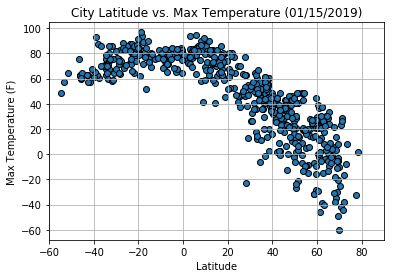

In [17]:
# Build a scatter plot City Latitude vs. Max Temperature

plt.scatter(cities_weather_df["Lat"], cities_weather_df["Max Temp"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)


# Save the figure
plt.savefig("lat_vs_maxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

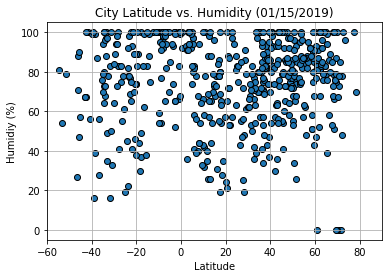

In [18]:
# City Latitude vs Humidity
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Humidity"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Humidiy (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)

# Save the figure
plt.savefig("lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

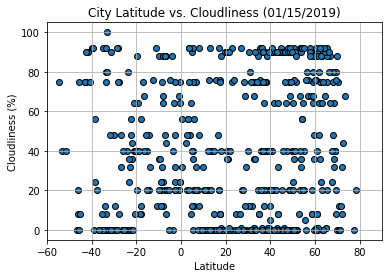

In [19]:
# City Latitude vs Cloudliness
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Cloudliness"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Cloudliness {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Cloudliness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)
         
# Save the figure
plt.savefig("lat_vs_cloudliness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

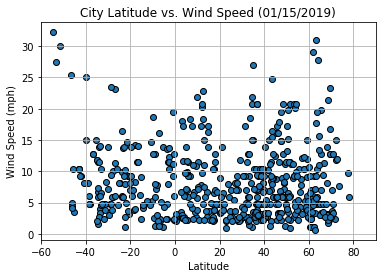

In [20]:
# City Latitude vs Wind Speed
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Wind Speed"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)

# Save the figure
plt.savefig("lat_vs_windspeed.png")

# Show plot
plt.show()